- Introducción: https://towardsdatascience.com/a-practical-introduction-to-llms-65194dda1148

- Referencia notebook: https://towardsdatascience.com/cracking-open-the-openai-python-api-230e4cae7971

- Otros link de interes: https://www.freecodecamp.org/news/beginners-guide-to-langchain/

## API para python de OpenAI

Podemos usar las apis para interactuar con distintos LLMs. Uno de los más populares es la API de OpenAI,  en donde utilizaremos nuestros promps directamente desde python.

Esta forma de trabajo nos da acceso a diversos LLM disponibles. El problema es la mayoria de estas APIs son de pago.

Algunas ventajas de utilizar la API:

- Puedes customizar el mensaje del sistema
- Puedes ajustar los parametros de inputs, tales como el tamaño maximo de la respuesta, el número de respuestas y la temperatura/aleatoridad.
- Puedes incluir imagenes y otros tipos de archivos en los prompts.
- Puedes extraer embeddings de palabras.
- Puedes trascribir inputs de audios.

### Precio y Tokens.

Aunque la API de OpenAI brinda a los desarrolladores un acceso fácil a modelos de ML de vanguardia, una desventaja evidente es que tiene un costo. El precio se calcula en función de los tokens utilizados.

Los tokens, en el contexto de LLMs, son básicamente un conjunto de números que representan un conjunto de palabras y caracteres. Por ejemplo, "The" podría ser un token, " end" (con el espacio) podría ser otro, y "." otro.

Así, el texto "The End." consistiría en 3 tokens, digamos (73, 102, 6).

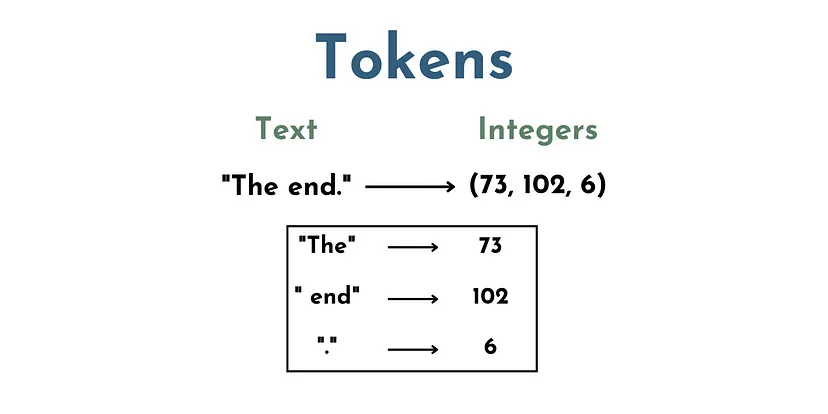


Este es un paso crítico porque los LLMs (es decir, redes neuronales) no "entienden" el texto directamente. El texto debe convertirse en una representación numérica para que el modelo pueda realizar operaciones matemáticas en la entrada.






## Utilizando la API


### Paso 1: Crear una cuenta
 Ve a la pagina de la [API de OpenAI](https://platform.openai.com/overview) y has click en **Sign Up**. Si ya has usado ChatGTP es probable que ya tengas una cuenta.

### Paso 2: Añadir método de pago.
Si nuestra cuenta tiene más de 3 meses o ya consumimos los creditos que nos dan, te solicitaran añadir un método de pago. Para ello:
- Has clic en tu imagen de perfil y selecciona la opcion **manage account**.
- Añade un método de pago haciendo click en **Billing** y luego **Payment methods**.



### Paso 3: Fijar un limite de uso

Puedes fijar un limite de uso para evitar gastos mayores a lo que deseas. Este limite puede ser seteado en *Soft* o *Hard*.

### Paso 4: Obtener API secret Key.

- Has click en **View API Keys**
- Si es la primera vez, debes crear una nueva llave secreta, pero ello has click en **Create new secret key**.

- Ponle un nombre y luego has click en **Create secret key**

- Esta llave se muestra una unica vez! guardala bien

## Ejemplo: Chat Completion API.

Vamos a comenzar con una llamada de API super simple. Aquí pasaremos dos entradas al método openai.ChatCompletions.create():

- model: define el nombre del modelo de lenguaje que queremos utilizar (podemos elegir entre los modelos enumerados anteriormente en el artículo).
- messages: establece el diálogo de chat *precedente* como una lista de diccionarios. 
Los diccionarios tienen dos pares clave-valor (por ejemplo, {"role": "user", "content": "Listen to your"}). 

Primero, "role" define quién está hablando (por ejemplo, "role": "user"). Esto puede ser el "usuario", "asistente" o "sistema". En segundo lugar, "content" define lo que dice el rol (por ejemplo, "content": "Listen to your"). Aunque esto puede sentirse más restrictivo que una interfaz de indicación libre, podemos ser creativos con los mensajes de entrada para optimizar las respuestas para un caso de uso particular (más sobre esto más adelante).

In [3]:
#! pip install openai

In [3]:
import openai
from my_key import key #import secret key from sk.py file
import time

In [4]:
openai.api_key = key # use imported sk or just copy-paste it here


In [5]:
# create a chat completion
chat_completion = openai.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Listen to your",
        }
    ],
    model="gpt-3.5-turbo",
)

In [6]:
print(chat_completion.choices[0].message.content)

heart and trust your instincts. It knows what is best for you and will guide you in the right direction. Be honest with yourself and follow your inner voice, even if it means stepping out of your comfort zone. Remember to be true to yourself and stay true to your values. Trust yourself and have faith in your decisions. You are capable of achieving great things if you believe in yourself.


In [7]:
chat_completion

ChatCompletion(id='chatcmpl-9MQglmRthlqEkDg86MJWlECYbEG3B', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='heart and trust your instincts. It knows what is best for you and will guide you in the right direction. Be honest with yourself and follow your inner voice, even if it means stepping out of your comfort zone. Remember to be true to yourself and stay true to your values. Trust yourself and have faith in your decisions. You are capable of achieving great things if you believe in yourself.', role='assistant', function_call=None, tool_calls=None))], created=1715132835, model='gpt-3.5-turbo-0125', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=78, prompt_tokens=10, total_tokens=88))


El significado de cada campo se enumera a continuación:

- `Id`: ID único para la respuesta de la API
- `Object`: nombre del objeto de la API que envió la respuesta
- `Created`: marca de tiempo UNIX de cuándo se procesó la solicitud de la API
- `Model`: nombre del modelo utilizado
- `Choices`: respuesta del modelo formateada en JSON (es decir, similar a un diccionario)
- `Usage`: metadatos de conteo de tokens formateados en JSON (es decir, similar a un diccionario)

Sin embargo, lo más importante aquí es el campo `Choices`, ya que aquí es donde se almacena la respuesta del modelo. 

### max_tokens


Primero, podemos establecer el número máximo de tokens permitidos en la respuesta del modelo utilizando el parámetro de entrada max_tokens. Esto puede ser útil por muchas razones según el caso de uso. En este caso, si queremos solo una palabra como respuesta, fijamos en 1 el token.


In [10]:
chat_completion = openai.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Listen to your",
        }
    ],
    model="gpt-3.5-turbo",
    max_tokens = 5
)

In [11]:
print(chat_completion.choices[0].message.content)


 intuition and trust your instincts


### n

A continuación, podemos establecer el número de respuestas que nos gustaría recibir del modelo Por ejemplo, si queremos generar un conjunto de respuestas entre las cuales podemos seleccionar la que más nos guste:

In [12]:
# create a chat completion
chat_completion = openai.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Listen to your",
        }
    ],
    model="gpt-3.5-turbo",
    max_tokens = 2,
    n = 5
)
# print the chat completion
for i in range(len(chat_completion.choices)):
    print(chat_completion.choices[i].message.content)

 inner voice
 heart and
inner voice
 instincts.
heart.


Observa que no todas las completaciones son idénticas. Esto puede ser algo bueno o malo dependiendo del caso de uso (por ejemplo, casos de uso creativos versus casos de uso de automatización de procesos). Por lo tanto, puede ser ventajoso ajustar la diversidad de las completaciones del chat para una indicación dada.






### temperatura

Resulta que podemos hacer esto ajustando el parámetro de temperatura. En pocas palabras, esto ajusta la "aleatoriedad" de las completaciones del chat. Los valores para este parámetro van de 0 a 2, donde 0 hace que las completaciones sean más predecibles y 2 hace que sean menos predecibles.

Conceptualmente, podemos pensar que temp=0 se ajustará a la palabra siguiente más probable, mientras que temp=2 permitirá completaciones que son relativamente improbables.

In [13]:
# create a chat completion
chat_completion = openai.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Listen to your",
        }
    ],
    model="gpt-3.5-turbo",
    max_tokens = 2,
    n = 5,
    temperature = 0
)
# print the chat completion
for i in range(len(chat_completion.choices)):
    print(chat_completion.choices[i].message.content)

heart,
heart,
heart,
heart,
heart,


In [14]:
# create a chat completion
chat_completion = openai.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Listen to your",
        }
    ],
    model="gpt-3.5-turbo",
    max_tokens = 2,
    n = 5,
    temperature = 2
)
# print the chat completion
for i in range(len(chat_completion.choices)):
    print(chat_completion.choices[i].message.content)

 inner guiding
heart,
 instincts and
<Music
voice inside


### Rol del mensajero: Lyric Completion Assistant

Finalmente, podemos aprovechar los diferentes roles en este paradigma de indicación basada en chat para ajustar aún más las respuestas del modelo de lenguaje.

Recuerda que podemos incluir contenido de 3 roles diferentes en nuestras indicaciones: sistema, usuario y asistente. El mensaje del sistema establece el contexto (o tarea) para las completaciones del modelo, por ejemplo, "Eres un amigable chatbot que no quiere destruir a todos los humanos" o "Resume las indicaciones del usuario en un máximo de 10 palabras".

Los mensajes del usuario y del asistente se pueden utilizar al menos de dos maneras. Uno, para generar ejemplos para el aprendizaje en contexto, y dos, para almacenar y actualizar el historial de conversación para un chatbot en tiempo real. Aquí usaremos ambas formas para crear un asistente de completado de letras.

Comenzamos haciendo que el mensaje del sistema sea "Soy un asistente de completado de letras de Roxette. Cuando se me proporciona una línea de una canción, proporcionaré la siguiente línea de la canción". Luego, proporcionamos dos ejemplos de mensajes de usuario y asistente. Seguido por la misma indicación del usuario utilizada en los ejemplos anteriores, es decir, "Escucha tu".

In [15]:
# initial prompt with system message and 2 task examples
messages_list = [{"role":"system", "content": "I am Roxette lyric completion assistant. When given a line from a song, I will provide the next line in the song."},
                 {"role":"user", "content": "I know there's something in the wake of your smile"},
                 {"role":"assistant", "content": "I get a notion from the look in your eyes, yeah"},
                 {"role":"user", "content": "You've built a love but that love falls apart"},
                 {"role":"assistant", "content": "Your little piece of Heaven turns too dark"},
                 {"role":"user", "content": "Listen to your"}]

# sequentially generate 4 chat completions
for i in range(4):
    
    chat_completion = openai.chat.completions.create(
    messages=messages_list,
    model="gpt-3.5-turbo",
    max_tokens = 15,
    n = 1,
    temperature = 0
    )

    # print the chat completion
    print(chat_completion.choices[0].message.content)

    new_message = {"role":"assistant", "content":chat_completion.choices[0].message.content} # append new message to message list
    messages_list.append(new_message)
    time.sleep(0.1)

Heart when he's calling for you
Listen to your heart, there's nothing else you can do
I don't know where you're going and I don't know why
But listen to your heart before you tell him goodbye


[Aca](https://www.azlyrics.com/lyrics/roxette/listentoyourheart.html) puedes ver la letra real y notarás que es la misma.